In [1]:
import sys
import logging

logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

def add_path(newPath:str) -> str:
    """
    Adds newPath to the existing sys path, if needed.
    :param newPath: gets added temporarily to the PYTHONPATH.
    :return: updated string
    """
    if newPath in sys.path:
        logger.warning(f'path: {newPath} is already on sys.path. (No action taken.)')
        return sys.path
    else:
        logger.debug(f'Adding new path: {newPath} to sys.path.')
        sys.path.append(newPath)
    return sys.path

add_path(r'C:\Users\Owner\PycharmProjects\Utilities')

DEBUG:__main__:Adding new path: C:\Users\Owner\PycharmProjects\Utilities to sys.path.


['C:\\Users\\Owner\\PycharmProjects\\DataScience',
 'C:\\Users\\Owner\\Anaconda3\\python37.zip',
 'C:\\Users\\Owner\\Anaconda3\\DLLs',
 'C:\\Users\\Owner\\Anaconda3\\lib',
 'C:\\Users\\Owner\\Anaconda3',
 '',
 'C:\\Users\\Owner\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Owner\\.ipython',
 'C:\\Users\\Owner\\PycharmProjects\\Utilities']

# Decision tree
# Step 1. Import data

In [2]:
# Import Cancer data from the Sklearn library
from PandasUtil import PandasUtil
pu = PandasUtil()
df = pu.read_df_from_csv(csv_file_name=r'C:\Users\Owner\Documents\Udemy\ML-Classification-Package\ML Classification Package\6. Decision Trees and Random Forest\amazon_alexa.tsv', sep='\t')
pu.get_rowCount_colCount(df)
df.tail()

DEBUG:matplotlib:$HOME=C:\Users\Owner
DEBUG:matplotlib:CONFIGDIR=C:\Users\Owner\.matplotlib
DEBUG:matplotlib:matplotlib data path: C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:loaded rc file C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
DEBUG:matplotlib:matplotlib version 3.0.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', 'site', 'os', 'stat', '_stat', 'ntpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', '_bootlocale', '_locale', 'encodings.cp1252', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importl

DEBUG:matplotlib:CACHEDIR=C:\Users\Owner\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Owner\.matplotlib\fontlist-v300.json
DEBUG:PandasUtil:df has 3150 rows and 5 columns.


,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [3]:
# Don't need the date.
pu.drop_col(df, 'date', is_in_place=True)
df.sample()

,rating,variation,verified_reviews,feedback
37,4,Heather Gray Fabric,Speaker is better than 1st generation Echo,1


In [4]:
pu.get_basic_data_analysis(df)

INFO:PandasUtil:info:
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
rating              3150 non-null int64
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(2)
memory usage: 98.6+ KB


# Visualize the data

In [5]:
from PlotUtil import PlotUtil
pltu = PlotUtil()
pltu.count_plot(df, 'variation', return_function_do_not_plot=False)


DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


<Figure size 640x480 with 1 Axes>

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [6]:
pos_mask = pu.mark_rows_by_criterion(df, 'feedback', 1)
pos_df = pu.masked_df(df, pos_mask)
neg_df = pu.masked_df(df, pos_mask, invert_mask=True)
neg_df.head()

,rating,variation,verified_reviews,feedback
46,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,Charcoal Fabric,Not much features.,0
162,1,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,Heather Gray Fabric,Sad joke. Worthless.,0


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


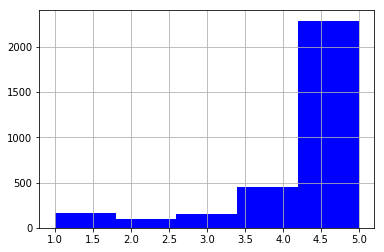

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


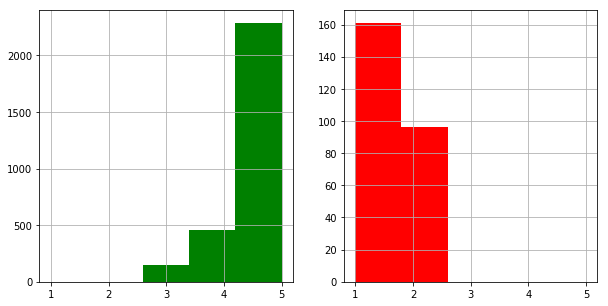

In [7]:
from matplotlib import pyplot as plt

pltu.histogram_plot(df, 'rating', bins=5, color='b', return_function_do_not_plot=False)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
pltu.histogram_plot(pos_df, 'rating', bins=5, color='g', range=(1,5), return_function_do_not_plot=True)
plt.subplot(1, 2, 2)
pltu.histogram_plot(neg_df, 'rating', bins=5, color='r', range=(1,5), return_function_do_not_plot=True)
plt.show()


# Feature Engineering

In [8]:
# get one-hot for variation
df_dummies = pu.dummy_var_df(df=df, columns='variation')
df_dummies.head()

,rating,verified_reviews,feedback,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,5,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Vectorize the data

In [9]:
from DataScienceUtil import DataScienceUtil
dsu = DataScienceUtil()
vec = dsu.count_vectorizer(df, 'verified_reviews')
logger.debug (f'vector is type: {type(vec)} and shape {vec.shape}')
features = dsu.vectorizer_features()
features[1000:1020]

DEBUG:LogitUtil:Entering init_logger.
DEBUG:LogitUtil:Exiting init_logger.
2020-04-14 21:11:18,897 INFO Starting
INFO:Util:Starting
DEBUG:__main__:vector is type: <class 'scipy.sparse.csr.csr_matrix'> and shape (3150, 4044)


['details',
 'detect',
 'determined',
 'developed',
 'developers',
 'development',
 'device',
 'deviceoverall',
 'devices',
 'devise',
 'devises',
 'dhiw',
 'diagnostics',
 'dial',
 'dictionary',
 'did',
 'didn',
 'didnt',
 'died',
 'dies']

# Fit the data
## First, define X and y

In [10]:
from PandasUtil import PandasUtil
pu = PandasUtil()
encoded_reviews = pu.convert_matrix_to_dataframe(vec.toarray())
encoded_reviews.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
length = df_dummies['verified_reviews'].apply(len)
cols_to_drop = ['rating', 'verified_reviews']

pu.drop_col(df_dummies, cols_to_drop, True)
# Combine the one-hot dummies and the count vectorizer. 
df2 = pu.join_dfs_on_index(df_dummies, encoded_reviews)
df2.head()


,feedback,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot,0,1,2,3,4,5,6,7,8,...,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
target_col = 'feedback'

X = pu.drop_col(df2, target_col, False).values

logger.debug(f'df without target col: {X[-2:]}')
y = df2[target_col].values
logger.debug(f'target column: {y[-2:]}')

DEBUG:__main__:df without target col: [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
DEBUG:__main__:target column: [1 1]


In [15]:
logger.info(f'Shape of X is {X.shape}.')

logger.debug(f'End of y is {y[-15:]}')

INFO:__main__:Shape of X is (3150, 4059).
DEBUG:__main__:End of y is [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Step 5. Model the data
# Step 6. Evaluate the model

## On to the test data

DEBUG:__main__:X_train and X_test shapes are (2520, 4059) and (630, 4059)
DEBUG:__main__:y_train and y_test shapes are (2520,) and (630,)
DEBUG:__main__:beginning of y_test (test data) is:   [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
DEBUG:__main__:classifier type is: <class 'sklearn.ensemble.forest.RandomForestClassifier'>
DEBUG:__main__:beginning of y_predict (predicted) is: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x00000265C9889E10>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x00000265C9889E10>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:

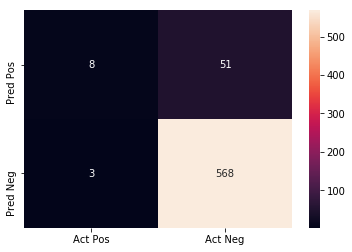

INFO:__main__:
              precision    recall  f1-score   support

           0       0.73      0.14      0.23        59
           1       0.92      0.99      0.95       571

    accuracy                           0.91       630
   macro avg       0.82      0.57      0.59       630
weighted avg       0.90      0.91      0.89       630



In [16]:
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from PlotUtil import PlotUtil

pltu = PlotUtil()

X_train, X_test, y_train, y_test = DataScienceUtil.train_test_split(X, y, test_frac=0.2, seed=5)
logger.debug(f'X_train and X_test shapes are {X_train.shape} and {X_test.shape}')
logger.debug(f'y_train and y_test shapes are {y_train.shape} and {y_test.shape}')
logger.debug(f'beginning of y_test (test data) is:   {y_test[:20]}')
extra_param = {'n_estimators': 150, 'criterion': 'entropy'}
classifier = DataScienceUtil.train_model(X_train, y_train, f_classifier=RandomForestClassifier, seed=0, param_dict=extra_param)
logger.debug(f'classifier type is: {type(classifier)}')
y_predict = DataScienceUtil.model_predict(classifier, X_test)
logger.debug(f'beginning of y_predict (predicted) is: {y_predict[:20]}')

pltu.confusion_matrix_test_vs_predict(y_test, y_predict)

report = DataScienceUtil.classification_report(y_test, y_predict)
logger.info(f'\n{report}')

# Step 7. Improve the model
Add the review length to the y set and see if it improves. 

DEBUG:__main__:df without target col: [[  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0 380]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4]]
DEBUG:__main__:X_train and X_test shapes are (2520, 16) and (630, 16)
DEBUG:__main__:y_train and y_test shapes are (2520,) and (630,)
DEBUG:__main__:beginning of y_test (test data) is:   [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
DEBUG:__main__:classifier type is: <class 'sklearn.ensemble.forest.RandomForestClassifier'>
DEBUG:__main__:beginning of y_predict (predicted) is: [1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x00000265CFD97FD0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x00000265CFD97FD0>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.

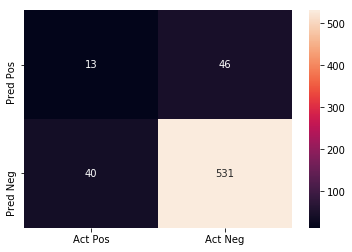

INFO:__main__:
              precision    recall  f1-score   support

           0       0.25      0.22      0.23        59
           1       0.92      0.93      0.93       571

    accuracy                           0.86       630
   macro avg       0.58      0.58      0.58       630
weighted avg       0.86      0.86      0.86       630



In [19]:
# Combine the length and the count vectorizer. 
df3 = pu.join_dfs_on_index(df_dummies, length)

X = pu.drop_col(df3, target_col, False).values
logger.debug(f'df without target col: {X[-2:]}')

X_train, X_test, y_train, y_test = DataScienceUtil.train_test_split(X, y, test_frac=0.2, seed=5)
logger.debug(f'X_train and X_test shapes are {X_train.shape} and {X_test.shape}')
logger.debug(f'y_train and y_test shapes are {y_train.shape} and {y_test.shape}')
logger.debug(f'beginning of y_test (test data) is:   {y_test[:20]}')
extra_param = {'n_estimators': 150, 'criterion': 'entropy'}
classifier = DataScienceUtil.train_model(X_train, y_train, f_classifier=RandomForestClassifier, seed=0, param_dict=extra_param)
logger.debug(f'classifier type is: {type(classifier)}')
y_predict = DataScienceUtil.model_predict(classifier, X_test)
logger.debug(f'beginning of y_predict (predicted) is: {y_predict[:20]}')

pltu.confusion_matrix_test_vs_predict(y_test, y_predict)

report = DataScienceUtil.classification_report(y_test, y_predict)
logger.info(f'\n{report}')